In [8]:
#Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import Keras packages for neural network design
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras.models import load_model
from keras import regularizers

#Load the Fashion-MNIST Data Set
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [9]:
#Set a random seed for reproducibility.
np.random.seed(42)

#Load in the Fashion MNIST data set.
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Reshape the data to have depth of 1.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

#Grayscale values run from 0 to 256.  This scales that data to a 0 to 1 range and converts to float.
#Perhaps unnecessary with Fashion MNIST, but scaling like this is best practice with image data.
#It also may improve computation efficiency.
x_train = x_train/255.
x_test = x_test/255.

#The target variable needs to be one-hot encoded, i.e.; converted into a purely categorical form.
#Leaving it as 0-9 would create false proximity relationships between the categories.
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [11]:
#The top-performing convolutional neural network structure (Accuracy > 0.93)
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1),padding='same'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))
cnn.add(Conv2D(32, kernel_size=3, activation='relu',padding='same'))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(24, kernel_size=3, activation='relu',padding='same'))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(64, kernel_size=3, activation='relu',padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(10, activation='softmax'))

cnn.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

#ModelCheckpoint allows us to extract the best end-of-epoch model.
#Under different circumstances, we might monitor validation loss instead of validation accuracy.
callback_list=[ModelCheckpoint(filepath='cnn.h5', monitor='val_acc', save_best_only=True, mode='max')]

cnn.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=3,verbose=1,callbacks=callback_list)

Epoch 1/3
469/469 [==============================] - 126s 269ms/step - loss: 0.5556 - accuracy: 0.8043 - val_loss: 0.4925 - val_accuracy: 0.8829
Epoch 2/3
469/469 [==============================] - 131s 279ms/step - loss: 0.3175 - accuracy: 0.8861 - val_loss: 0.2585 - val_accuracy: 0.9035
Epoch 3/3
469/469 [==============================] - 119s 253ms/step - loss: 0.2731 - accuracy: 0.9000 - val_loss: 0.2477 - val_accuracy: 0.9067


In [21]:
def accuracy_loss_plots(model):
    fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    #ax1.plot(model.history.history['val_acc'])
    ax1.set_title('Test Accuracy by Epoch')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(0.8,1)
    ax2.plot(model.history.history['loss'], label='Training loss')
    ax2.plot(model.history.history['val_loss'], label='Testing loss')
    ax2.set_title('Loss Reduction by Epoch')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(0,1)
    ax2.legend();

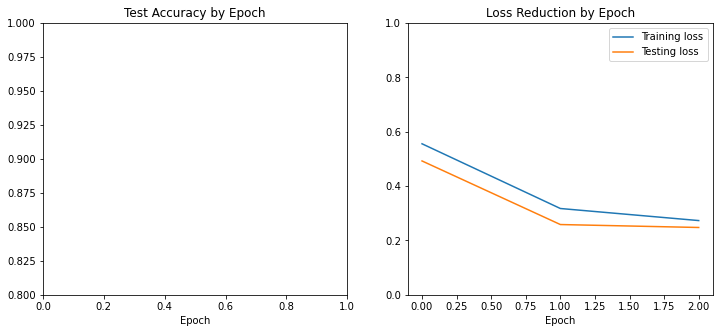

In [22]:
accuracy_loss_plots(cnn)

In [24]:
#Load in the best model state from ModelCheckpoint
cnn_best = load_model('cnn.h5')
#Confirm loss and accuracy on the test data
cnn_best.evaluate(x_test,y_test)

OSError: SavedModel file does not exist at: cnn/{saved_model.pbtxt|saved_model.pb}